In [6]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from util import load_dataset,prepareDataset,iou
from model import ResNet

In [8]:
prepareDataset()
train_X,train_Y,test_X,test_Y=load_dataset()

In [5]:
model = ResNet(input_shape = (90, 120, 3))
model.summary()

In [4]:
from keras.optimizers import Adam
opt=Adam(lr=0.00001,decay=0.0002)
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
model.fit(train_X,train_Y,epochs=150,batch_size=32,shuffle=True)

In [ ]:
trainPrediction=model.predict(train_X,batch_size=32,verbose=1)
testPrediction=model.predict(test_X,batch_size=32,verbose=1)
print("Accuracy on training set is: "+str(iou(trainPrediction,train_Y)))
print("Accuracy on testing set is: "+str(iou(testPrediction,test_Y)))

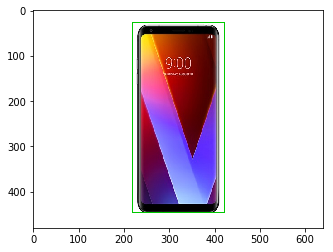

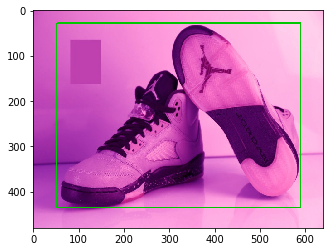

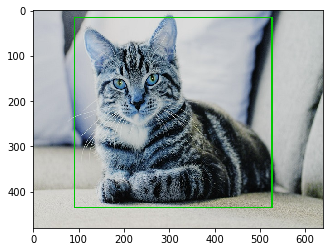

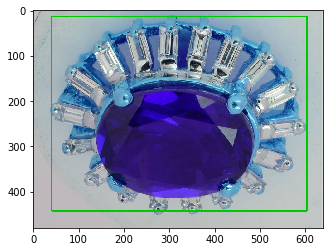

In [20]:
for img in os.listdir('Sample Images'):
    img=os.path.join('Sample Images',img)
    orig_img=cv2.imread(img)
    resized_img=cv2.resize(cv2.imread(img),(120,90))/255
    resized_img=np.expand_dims(resized_img,axis=0)
    prediction=model.predict(resized_img)
    boxed=cv2.rectangle(orig_img, (prediction[0,0], prediction[0,2]), (prediction[0,1], prediction[0,3]), (0, 200, 0), 2)
    plt.imshow(boxed)
    plt.show()
 